In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

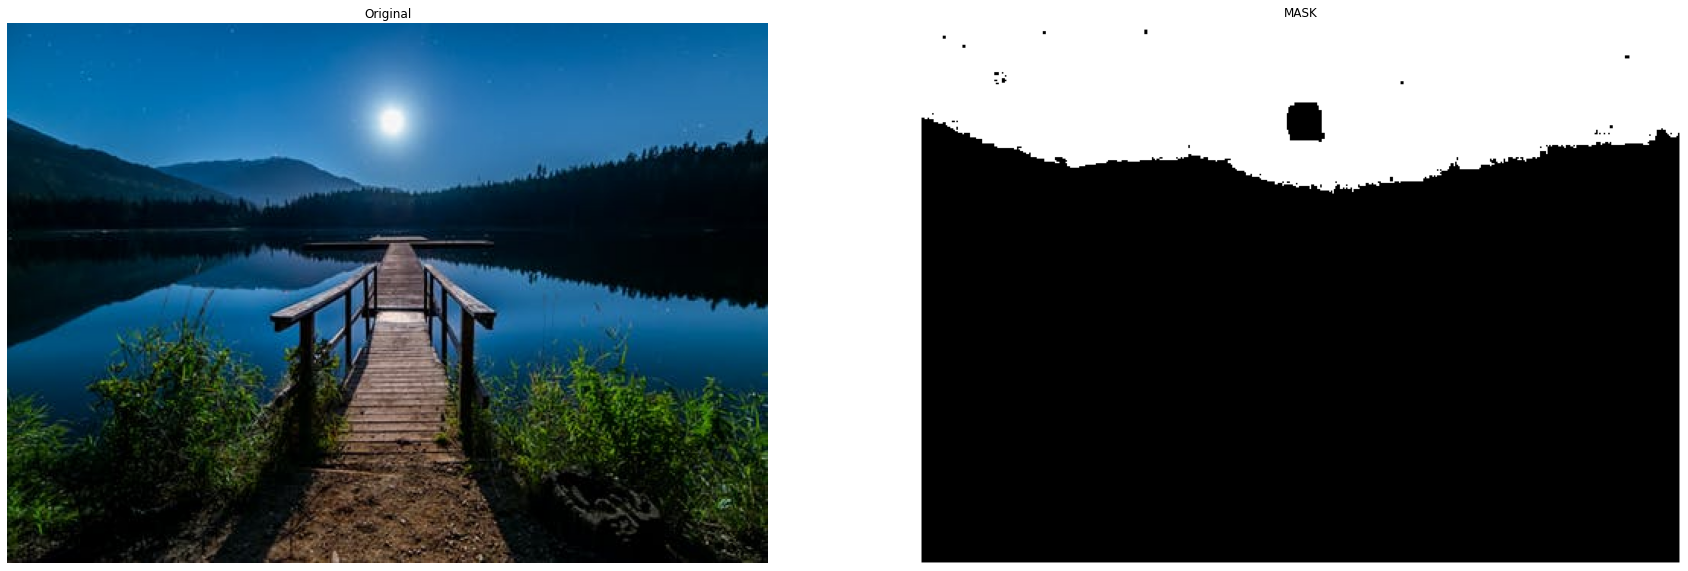

In [8]:
src = cv2.imread('../data/bridge.jpg')
srcrgb = cv2.cvtColor(src, cv2.COLOR_BGR2RGB)
mask = np.zeros((src.shape[0]+2, src.shape[1]+2), np.uint8)

seed = (180, 80)
newVal = 255
loDiff, upDiff = (5, 5, 5), (5, 5, 5)
floodeflags = cv2.FLOODFILL_MASK_ONLY
cv2.floodFill(src, mask, seedPoint=seed, newVal=newVal, loDiff=loDiff, upDiff=upDiff)
cv2.circle(src, seed, 2, (0, 255, 0), cv2.FILLED, cv2.LINE_AA);

plt.figure(figsize=(30, 30))
image1 = plt.subplot(1,2,1)
image1.set_title('Original')
plt.axis('off')
plt.imshow(srcrgb)

image2 = plt.subplot(1,2,2)
image2.set_title('MASK')
plt.axis('off')
plt.imshow(mask, cmap='gray')

In [11]:
src2 = cv2.imread('../data/duck.png')
mask = np.zeros((src2.shape[0]+2, src2.shape[1]+2), np.uint8)



def onMouse(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONDOWN:
        seed = (x, y)
        r = np.random.randint(256)
        g = np.random.randint(256)
        b = np.random.randint(256)
        newVal = (b, g, r)
        retval = cv2.floodFill(src2, mask, seed,  newVal=newVal, loDiff=loDiff, upDiff=upDiff)
        cv2.imshow('src2', src2)

cv2.imshow('src2', src2)
cv2.setMouseCallback('src2', onMouse)
cv2.waitKey(0)
cv2.destroyAllWindows()